# <span id="toc">  Esercizio 6 - Modello di Ising </span>

- [Esercizio 6.1](#ex06_1)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Il **modello di Ising** rappresenta un sistema di $N$ spin posizioni in un reticolo, che possono assumere due valori discreti $s_i = \pm 1$ e interagiscono con i loro primi vicini. 

L’energia del sistema dipende dall'orientazione di ciascuno di questi spin, ed è descritta dall’Hamiltoniana:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove il primo termine rappresenta l’interazione tra spin vicini, con costante di accoppiamento $J$, e il secondo l’interazione con il campo esterno $h$.  

Fissata una certa temperatura $T$, la probabilità di una configurazione di spin è data dal peso di Boltzmann $\propto \exp(-\beta H)/Z$, dove $\beta = \frac{1}{k_B T}$ e assumendo $\mu_B=k_B=1$.

## <span id="ex06_1">  Esercizio 6.1 </span>[^](#toc)

Per campionare queste configurazioni si utilizzano algoritmi Monte Carlo, in particolare in questo esercizio implemento e confronto due metodi:

- **Metropolis**: ogni spin viene proposto per il flip con un valore casuale viene accettato/rifiutato secondo la variazione di energia. In questo modo il sistema esplora lo spazio delle configurazioni mantenendo la distribuzione di Boltzmann, anche se molti tentativi possono venire rifiutati.
  
- **Gibbs**: ogni spin viene aggiornato scegliendo direttamente il nuovo valore secondo la distribuzione condizionata che tiene conto dei due vicini e del campo esterno. In questo modo ogni aggiornamento è sempre accettato e il sistema si muove più rapidamente verso la configurazione di equilibrio.

Grazie a questi algoritmi, voglio stimare le seguenti grandezze fisiche per ogni spin del sistema:

- **Energia interna**: $U(N,T) = \langle H \rangle_{h=0}$
- **Capacità termica**: $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
- **Suscettività magnetica**: $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
- **Magnetizzazione**: $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Queste quantità verranno studiate come funzione della temperatura $T \in [0.5, 2.0]$, per un sistema di $N=50$ spin con $J=1$, confrontando poi i risultati ottenuti con entrambi i metodi di campionamento con le curve teoriche esatte.

Per automatizzare le simulazioni ho realizzato uno script bash che varia in automatico la temperatura all’interno dell’intervallo richiesto, con passo $\Delta T = 0.1$.  
Per ciascun valore di $T$ vengono calcolate le grandezze di interesse sia in assenza di campo esterno ($h=0$) sia con un campo debole ($h=0.02$), utilizzando entrambi gli algoritmi.

### Fase di equilibrazione

Prima di poter raccogliere dati attendibili è necessario che il sistema raggiunga l’equilibrio termico con il bagno di temperatura imposto.  
Partendo da una configurazione casuale infatti, l’evoluzione porta il sistema a esplorare gradualmente configurazioni tipiche della distribuzione di Boltzmann e durante questa fase iniziale le osservabili mostrano un transiente, dopo il quale si stabilizzano attorno a valori medi stazionari. 

Questo tipo di comportamento dipende dalle condizioni iniziali del sistema, e quindi quest'ultimo andrebbe riequilibrato ogni qual volta si decide di cambiare uno dei parametri come la tempratura o il campo esterno.

Per verificarlo ho analizzato l’andamento dei valori di energia interna $U/N$ (con $h=0$) e magnetizzazione $M/N$ (con $h=0.02$), confrontando Metropolis e Gibbs sia a bassa temperatura $T=0.5$ che ad alta temperatura $T=2.0$, impostando i seguenti parametri:

```
2000  blocchi
1     step per blocco
```

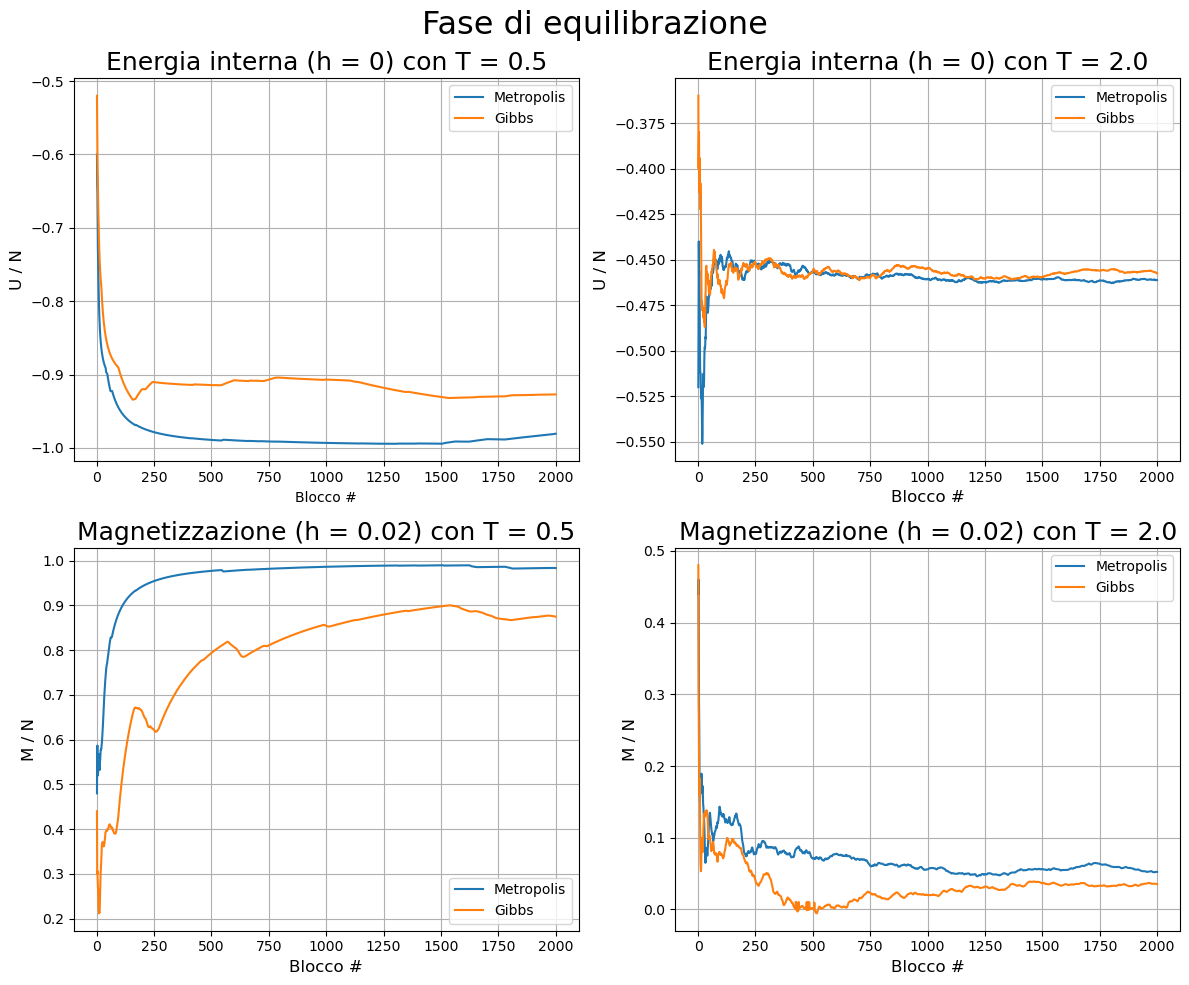

In [2]:
# Fase di equilibrazione
plt.figure(figsize=(12,10))
plt.suptitle('Fase di equilibrazione', fontsize=23)

# Energia interna T=0.5
plt.subplot(2,2,1)
block, d_gs_unif = np.loadtxt('OUTPUT/equilibration/metropolis/h_0.0/T_0.5/total_energy.dat', skiprows=1, usecols=(0,2), unpack=True)
block, d_gs_gauss = np.loadtxt('OUTPUT/equilibration/gibbs/h_0.0/T_0.5/total_energy.dat', skiprows=1, usecols=(0,2), unpack=True)
plt.plot(block, d_gs_unif, label='Metropolis')
plt.plot(block, d_gs_gauss, label='Gibbs')
plt.xlabel('Blocco #', fontsize=10)
plt.ylabel('U / N', fontsize=12)
plt.title('Energia interna (h = 0) con T = 0.5', fontsize=18)
plt.grid(True)
plt.legend()

# Energia interna T=2.0
plt.subplot(2,2,2)
block, d_es_unif = np.loadtxt('OUTPUT/equilibration/metropolis/h_0.0/T_2.0/total_energy.dat', skiprows=1, usecols=(0,2), unpack=True)
block, d_es_gauss = np.loadtxt('OUTPUT/equilibration/gibbs/h_0.0/T_2.0/total_energy.dat', skiprows=1, usecols=(0,2), unpack=True)
plt.plot(block, d_es_unif, label='Metropolis')
plt.plot(block, d_es_gauss, label='Gibbs')
plt.xlabel('Blocco #', fontsize=12)
plt.ylabel('U / N', fontsize=12)
plt.title('Energia interna (h = 0) con T = 2.0', fontsize=18)
plt.grid(True)
plt.legend()

# Magnetizzazione T=0.5
plt.subplot(2,2,3)
block, d_gs_unif = np.loadtxt('OUTPUT/equilibration/metropolis/h_0.02/T_0.5/magnetization.dat', skiprows=1, usecols=(0,2), unpack=True)
block, d_gs_gauss = np.loadtxt('OUTPUT/equilibration/gibbs/h_0.02/T_0.5/magnetization.dat', skiprows=1, usecols=(0,2), unpack=True)
plt.plot(block, d_gs_unif, label='Metropolis')
plt.plot(block, d_gs_gauss, label='Gibbs')
plt.xlabel('Blocco #', fontsize=12)
plt.ylabel('M / N', fontsize=12)
plt.title('Magnetizzazione (h = 0.02) con T = 0.5', fontsize=18)
plt.grid(True)
plt.legend()

# Magnetizzazione T=2.0
plt.subplot(2,2,4)
block, d_es_unif = np.loadtxt('OUTPUT/equilibration/metropolis/h_0.02/T_2.0/magnetization.dat', skiprows=1, usecols=(0,2), unpack=True)
block, d_es_gauss = np.loadtxt('OUTPUT/equilibration/gibbs/h_0.02/T_2.0/magnetization.dat', skiprows=1, usecols=(0,2), unpack=True)
plt.plot(block, d_es_unif, label='Metropolis')
plt.plot(block, d_es_gauss, label='Gibbs')
plt.xlabel('Blocco #', fontsize=12)
plt.ylabel('M / N', fontsize=12)
plt.title('Magnetizzazione (h = 0.02) con T = 2.0', fontsize=18)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Dai grafici si osserva che in generale a bassa tempertura il sistema tende a essere ordinato, quindi da una configurazione casuale serve più tempo per stabilizzarsi. Al contrario ad alta temperatura le fluttuazioni termiche dominano, quindi il sistema è più disordinato e raggiunge più rapidamente l’equilibrio.  

In teoria bisognerebbe equilibrare il sistema per ogni nuovo valore di temperatura, nel mio script quindi ho implementato un `restart`: la configurazione finale a una certa temperatura viene usata come stato iniziale per la successiva.  
  
Questo riduce i tempi di equilibrazione, ma può introdurre dipendenza dall’ordine con cui si percorre la griglia di $T$.  
In questa simulazione ho scelto di procedere in ordine decrescente di temperatura, avendo constatato che a temperature alte il sistema sembra già ben equilibrato.

L’alternativa sarebbe procedere in ordine crescente, partendo da quella più bassa dopo aver eseguito una equilibrazione iniziale più lunga. In questo modo si partirebbe da un sistema più ordinato e, aumentando gradualmente la temperatura, l’ordine verrebbe perso rapidamente rendendo l’equilibrazione alle temperature successive più efficiente.

Uno sviluppo futuro potrebbe essere quello di provare entrmabi i metodi e confrontare i risultati.

In [3]:
# Temperature simulate
T_sim = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

In [4]:
# Curva teorica
points = 100
T = np.linspace(0.3, 2.2, num=points)
b = 1/T
J = 1.0
Ns = 50
th = np.tanh(J / T)
thN = th**Ns
ch = 1 / th

In [5]:
# Curva teorica discreta
T_s = np.asarray(T_sim, dtype=float)
b_s = 1/T_s
th_s = np.tanh(J / T_s)
thN_s = th_s**Ns
ch_s = 1 / th_s

### Energia interna

Per questa e per tutte le successive stime ho utilizzato i seguenti parametri:

```
20     blocchi
20000  step per blocco
```

In questo caso il campo esterno è $h=0$.

I risultati ottenuti al variare della temperatura, con entrambi i metodi di campionamento, sono confrontati con la curva teorica calcolata come:

$$
\frac{U(N,T)}{N} = -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

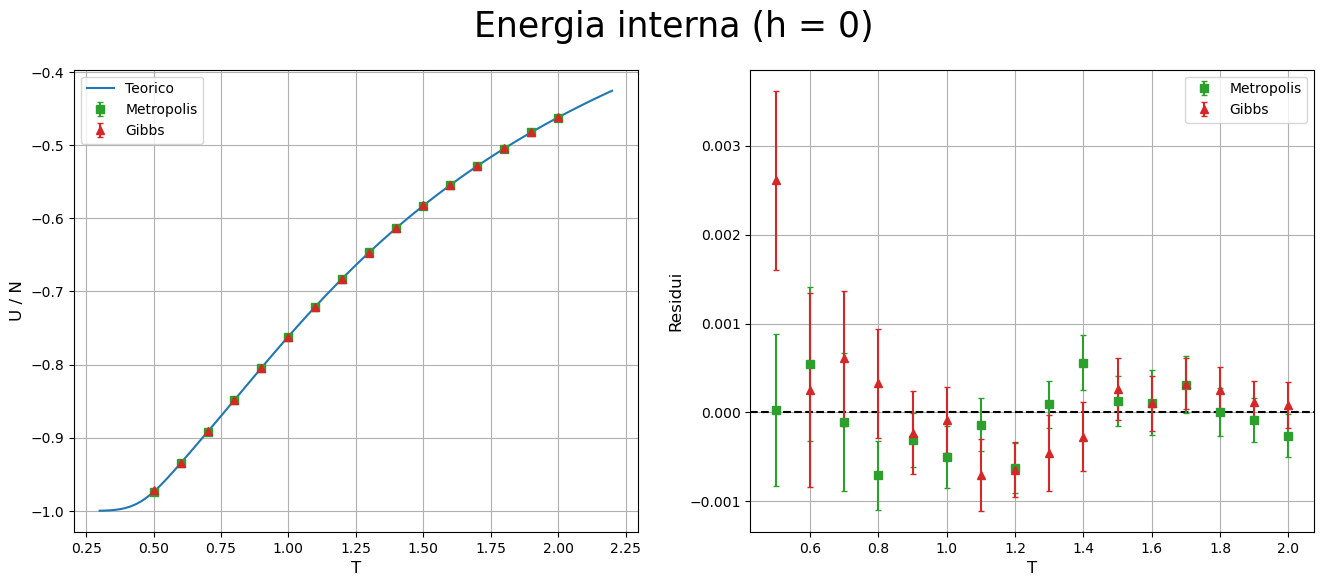

In [6]:
# Energia interna
U = -J * (th + ch * thN) / (1 + thN)
U_s = -J * (th_s + ch_s * thN_s) / (1 + thN_s)

plt.figure(figsize=(16,6))
plt.suptitle('Energia interna (h = 0)', fontsize=25)

U_m = [np.loadtxt(f"OUTPUT/metropolis/h_0.0/T_{T}/total_energy.dat", skiprows=1)[-1, 2] for T in T_sim]
err_m = [np.loadtxt(f"OUTPUT/metropolis/h_0.0/T_{T}/total_energy.dat", skiprows=1)[-1, 3] for T in T_sim]
U_g = [np.loadtxt(f"OUTPUT/gibbs/h_0.0/T_{T}/total_energy.dat", skiprows=1)[-1, 2] for T in T_sim]
err_g = [np.loadtxt(f"OUTPUT/gibbs/h_0.0/T_{T}/total_energy.dat", skiprows=1)[-1, 3] for T in T_sim]

plt.subplot(1,2,1)
plt.plot(T, U, label= 'Teorico')
plt.errorbar(T_sim, U_m, yerr = err_m, fmt='s', capsize=2, color='tab:green', label='Metropolis')
plt.errorbar(T_sim, U_g, yerr = err_g, fmt='^', capsize=2, color='tab:red', label='Gibbs')
plt.xlabel('T', fontsize=12)
plt.ylabel('U / N', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.axhline(y=0, color='black', linestyle='--')
plt.errorbar(T_sim, U_m-U_s, yerr = err_m, fmt='s', capsize=2, color='tab:green', label='Metropolis')
plt.errorbar(T_sim, U_g-U_s, yerr = err_g, fmt='^', capsize=2, color='tab:red', label='Gibbs')
plt.xlabel('T', fontsize=12)
plt.ylabel('Residui', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

### Capacità termica

In questo caso il campo esterno è $h=0$.

I risultati ottenuti al variare della temperatura, con entrambi i metodi di campionamento, sono confrontati con la curva teorica calcolata come:

$$
\frac{C(N,T)}{N} = k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$


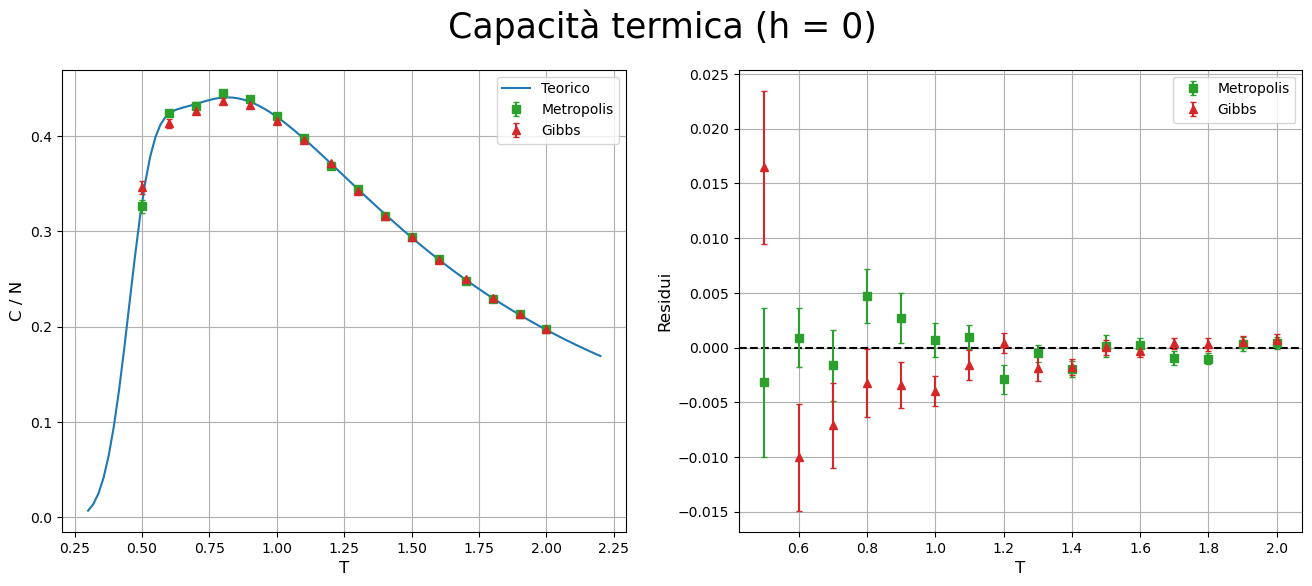

In [7]:
# Capacità termica
heat = ((b*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
heat_s = ((b_s*J)**2)*(((1+thN_s+(Ns-1)*(th_s**2)+(Ns-1)*(ch_s**2)*thN_s)/(1+thN_s))-Ns*((th_s+ch_s*thN_s)/(1+thN_s))**2)

plt.figure(figsize=(16,6))
plt.suptitle('Capacità termica (h = 0)', fontsize=25)

heat_m = [np.loadtxt(f"OUTPUT/metropolis/h_0.0/T_{T}/specific_heat.dat", skiprows=1)[-1, 2] for T in T_sim]
err_m = [np.loadtxt(f"OUTPUT/metropolis/h_0.0/T_{T}/specific_heat.dat", skiprows=1)[-1, 3] for T in T_sim]
heat_g = [np.loadtxt(f"OUTPUT/gibbs/h_0.0/T_{T}/specific_heat.dat", skiprows=1)[-1, 2] for T in T_sim]
err_g = [np.loadtxt(f"OUTPUT/gibbs/h_0.0/T_{T}/specific_heat.dat", skiprows=1)[-1, 3] for T in T_sim]

plt.subplot(1,2,1)
plt.plot(T, heat, label= 'Teorico')
plt.errorbar(T_sim, heat_m, yerr = err_m, fmt='s', capsize=2, color='tab:green', label='Metropolis')
plt.errorbar(T_sim, heat_g, yerr = err_g, fmt='^', capsize=2, color='tab:red', label='Gibbs')
plt.xlabel('T', fontsize=12)
plt.ylabel('C / N', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.axhline(y=0, color='black', linestyle='--')
plt.errorbar(T_sim, heat_m-heat_s, yerr = err_m, fmt='s', capsize=2, color='tab:green', label='Metropolis')
plt.errorbar(T_sim, heat_g-heat_s, yerr = err_g, fmt='^', capsize=2, color='tab:red', label='Gibbs')
plt.xlabel('T', fontsize=12)
plt.ylabel('Residui', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

### Suscettività magnetica

In questo caso il campo esterno è $h=0$.

I risultati ottenuti al variare della temperatura, con entrambi i metodi di campionamento, sono confrontati con la curva teorica calcolata come:

$$
\chi(T) = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

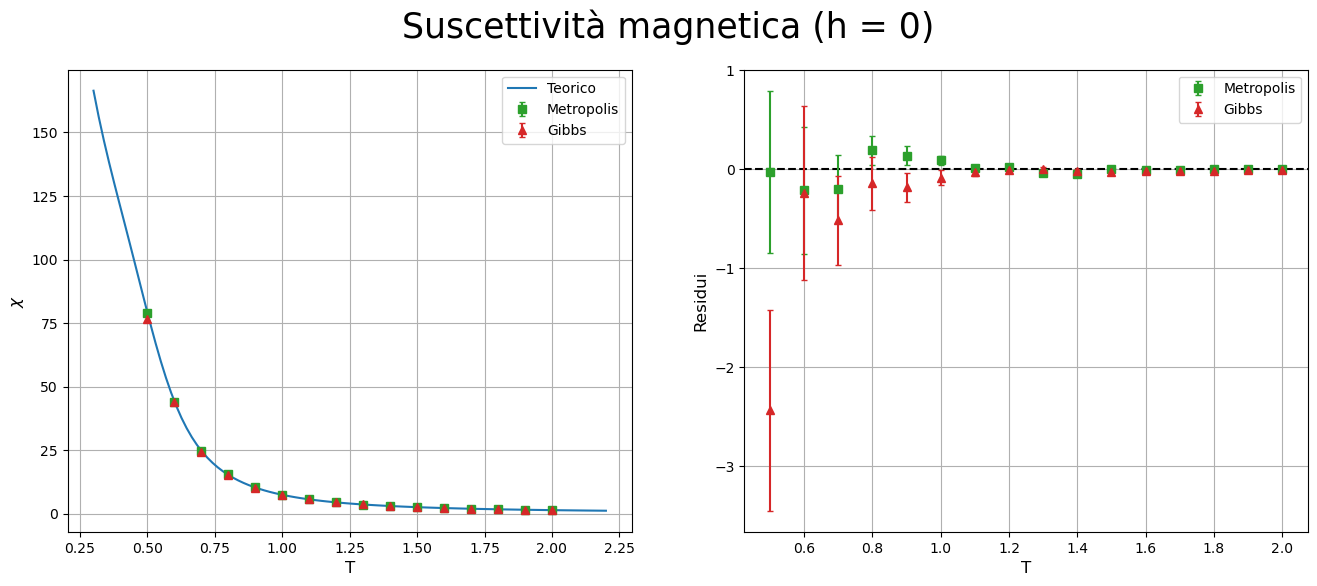

In [8]:
# Suscettività magnetica
X = b*np.exp(2*b*J)*(1-thN)/(1+thN)
X_s = b_s*np.exp(2*b_s*J)*(1-thN_s)/(1+thN_s)

plt.figure(figsize=(16,6))
plt.suptitle('Suscettività magnetica (h = 0)', fontsize=25)

X_m = [np.loadtxt(f"OUTPUT/metropolis/h_0.0/T_{T}/susceptibility.dat", skiprows=1)[-1, 2] for T in T_sim]
err_m = [np.loadtxt(f"OUTPUT/metropolis/h_0.0/T_{T}/susceptibility.dat", skiprows=1)[-1, 3] for T in T_sim]
X_g = [np.loadtxt(f"OUTPUT/gibbs/h_0.0/T_{T}/susceptibility.dat", skiprows=1)[-1, 2] for T in T_sim]
err_g = [np.loadtxt(f"OUTPUT/gibbs/h_0.0/T_{T}/susceptibility.dat", skiprows=1)[-1, 3] for T in T_sim]

plt.subplot(1,2,1)
plt.plot(T, X, label= 'Teorico')
plt.errorbar(T_sim, X_m, yerr = err_m, fmt='s', capsize=2, color='tab:green', label='Metropolis')
plt.errorbar(T_sim, X_g, yerr = err_g, fmt='^', capsize=2, color='tab:red', label='Gibbs')
plt.xlabel('T', fontsize=12)
plt.ylabel('$\chi$', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.axhline(y=0, color='black', linestyle='--')
plt.errorbar(T_sim, X_m-X_s, yerr = err_m, fmt='s', capsize=2, color='tab:green', label='Metropolis')
plt.errorbar(T_sim, X_g-X_s, yerr = err_g, fmt='^', capsize=2, color='tab:red', label='Gibbs')
plt.xlabel('T', fontsize=12)
plt.ylabel('Residui', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

### Magnetizzazione

In questo caso il campo esterno è $h=0.02$.

I risultati ottenuti al variare della temperatura, con entrambi i metodi di campionamento, sono confrontati con la curva teorica calcolata come:

$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

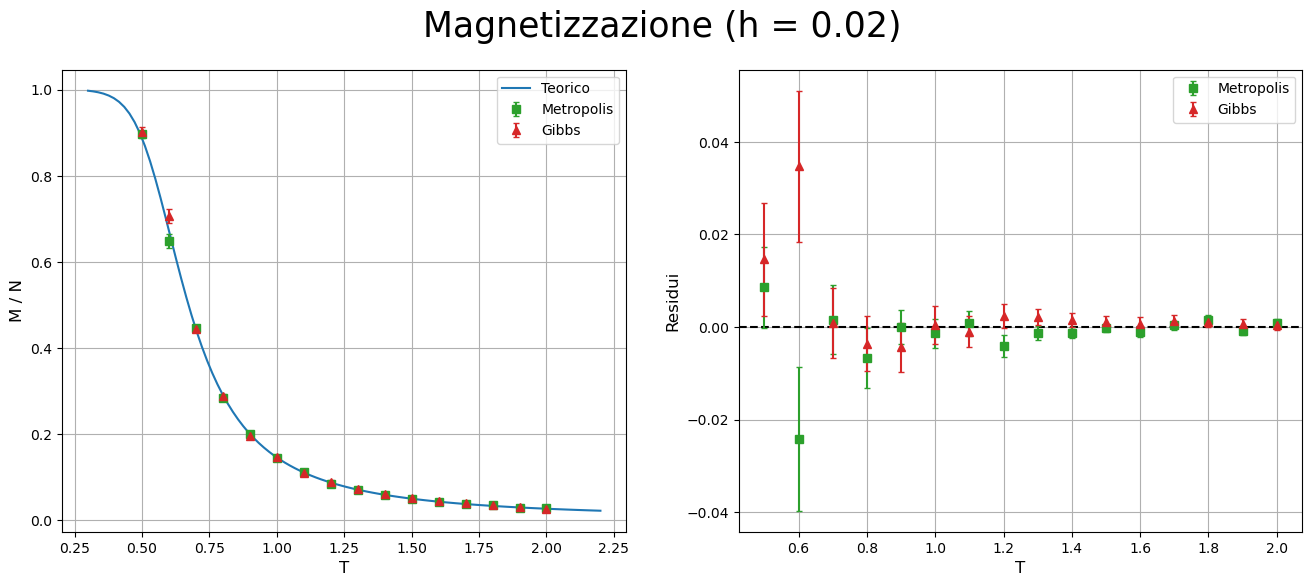

In [9]:
h = 0.02 # Campo esterno

# Magnetizzazione
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

l1_s = np.exp(b_s*J)*np.cosh(b_s*h)+np.sqrt(np.exp(2*b_s*J)*np.cosh(b_s*h)*np.cosh(b_s*h)-2*np.sinh(2*b_s*J))
l2_s = np.exp(b_s*J)*np.cosh(b_s*h)-np.sqrt(np.exp(2*b_s*J)*np.cosh(b_s*h)*np.cosh(b_s*h)-2*np.sinh(2*b_s*J))
Z_s = l1_s**Ns + l2_s**Ns
M_s = (np.exp(b_s*J)*np.sinh(b_s*h)*((l1_s**(Ns-1))*(1+np.exp(b_s*J)*np.cosh(b_s*h)/np.sqrt(np.exp(2*b_s*J)*np.cosh(b_s*h)*np.cosh(b_s*h)-2*np.sinh(2*b_s*J))) 
        + (l2_s**(Ns-1))*(1-np.exp(b_s*J)*np.cosh(b_s*h)/np.sqrt(np.exp(2*b_s*J)*np.cosh(b_s*h)*np.cosh(b_s*h)-2*np.sinh(2*b_s*J)))))/(Z_s)

plt.figure(figsize=(16,6))
plt.suptitle('Magnetizzazione (h = 0.02)', fontsize=25)

M_m = [np.loadtxt(f"OUTPUT/metropolis/h_0.02/T_{T}/magnetization.dat", skiprows=1)[-1, 2] for T in T_sim]
err_m = [np.loadtxt(f"OUTPUT/metropolis/h_0.02/T_{T}/magnetization.dat", skiprows=1)[-1, 3] for T in T_sim]
M_g = [np.loadtxt(f"OUTPUT/gibbs/h_0.02/T_{T}/magnetization.dat", skiprows=1)[-1, 2] for T in T_sim]
err_g = [np.loadtxt(f"OUTPUT/gibbs/h_0.02/T_{T}/magnetization.dat", skiprows=1)[-1, 3] for T in T_sim]

plt.subplot(1,2,1)
plt.plot(T, M, label= 'Teorico')
plt.errorbar(T_sim, M_m, yerr = err_m, fmt='s', capsize=2, color='tab:green', label='Metropolis')
plt.errorbar(T_sim, M_g, yerr = err_g, fmt='^', capsize=2, color='tab:red', label='Gibbs')
plt.xlabel('T', fontsize=12)
plt.ylabel('M / N', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.axhline(y=0, color='black', linestyle='--')
plt.errorbar(T_sim, M_m-M_s, yerr = err_m, fmt='s', capsize=2, color='tab:green', label='Metropolis')
plt.errorbar(T_sim, M_g-M_s, yerr = err_g, fmt='^', capsize=2, color='tab:red', label='Gibbs')
plt.xlabel('T', fontsize=12)
plt.ylabel('Residui', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

Dai grafici si osserva che in tutti i casi, alle basse temperature i residui risultano più dispersi e con barre di errore più grandi, a causa della dinamica lenta del sistema che rende le misure più correlate e aumenta le fluttuazioni statistiche. In questi casi si potrebbe pensare di aumentare il numero di blocchi per ridurre la correlazione tra campioni consecutivi.

Salendo in temperatura i punti si avvicinano alla curva teorica con incertezze più ridotte, perché le configurazioni vengono esplorate più rapidamente.  

In generale a basse $T$ il metodo Metropolis sembra fornire stime leggermente più stabili rispetto a Gibbs, anche se entrambi i metodi restituiscono risultati in buon accordo con la teoria, sempre entro una o due barre di errore.